In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 设置中文显示
# 设置字体为 SimHei
rc = {'font.sans-serif': ['SimHei'],
      'axes.unicode_minus': False}
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb

SyntaxError: trailing comma not allowed without surrounding parentheses (1680821321.py, line 9)

In [86]:
train_df = pd.read_csv(r'D:\pycharmproject\kaggle\Enerage_data_visalization\train_energy_data.csv')
train_df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


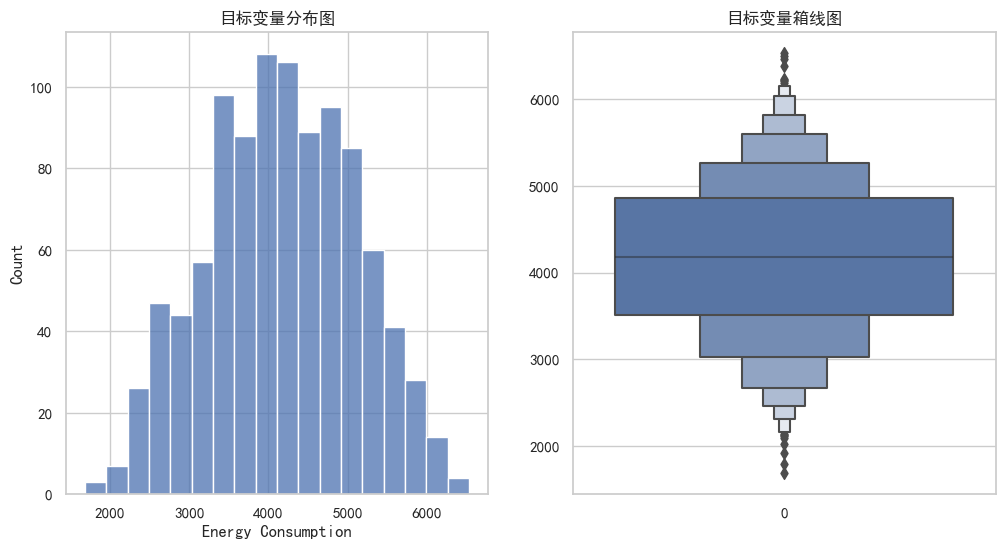

In [87]:
sns.set(style='whitegrid', rc=rc)
# target variable
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(train_df['Energy Consumption'], ax=ax[0])
ax[0].set_title('目标变量分布图')
sns.boxenplot(train_df['Energy Consumption'], ax=ax[1])
ax[1].set_title('目标变量箱线图')
plt.show()

In [88]:
num_col  = [i for i in train_df.columns if len(train_df[i].unique()) > 10]
cat_col = [i for i in train_df.columns if i not in num_col]
print(f'有{len(num_col)}个数值型特征, 有{len(cat_col)}个类别型特征')

有5个数值型特征, 有2个类别型特征


# 描述性统计

In [ ]:
train_df[num_col].describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


# 单变量统计

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_i

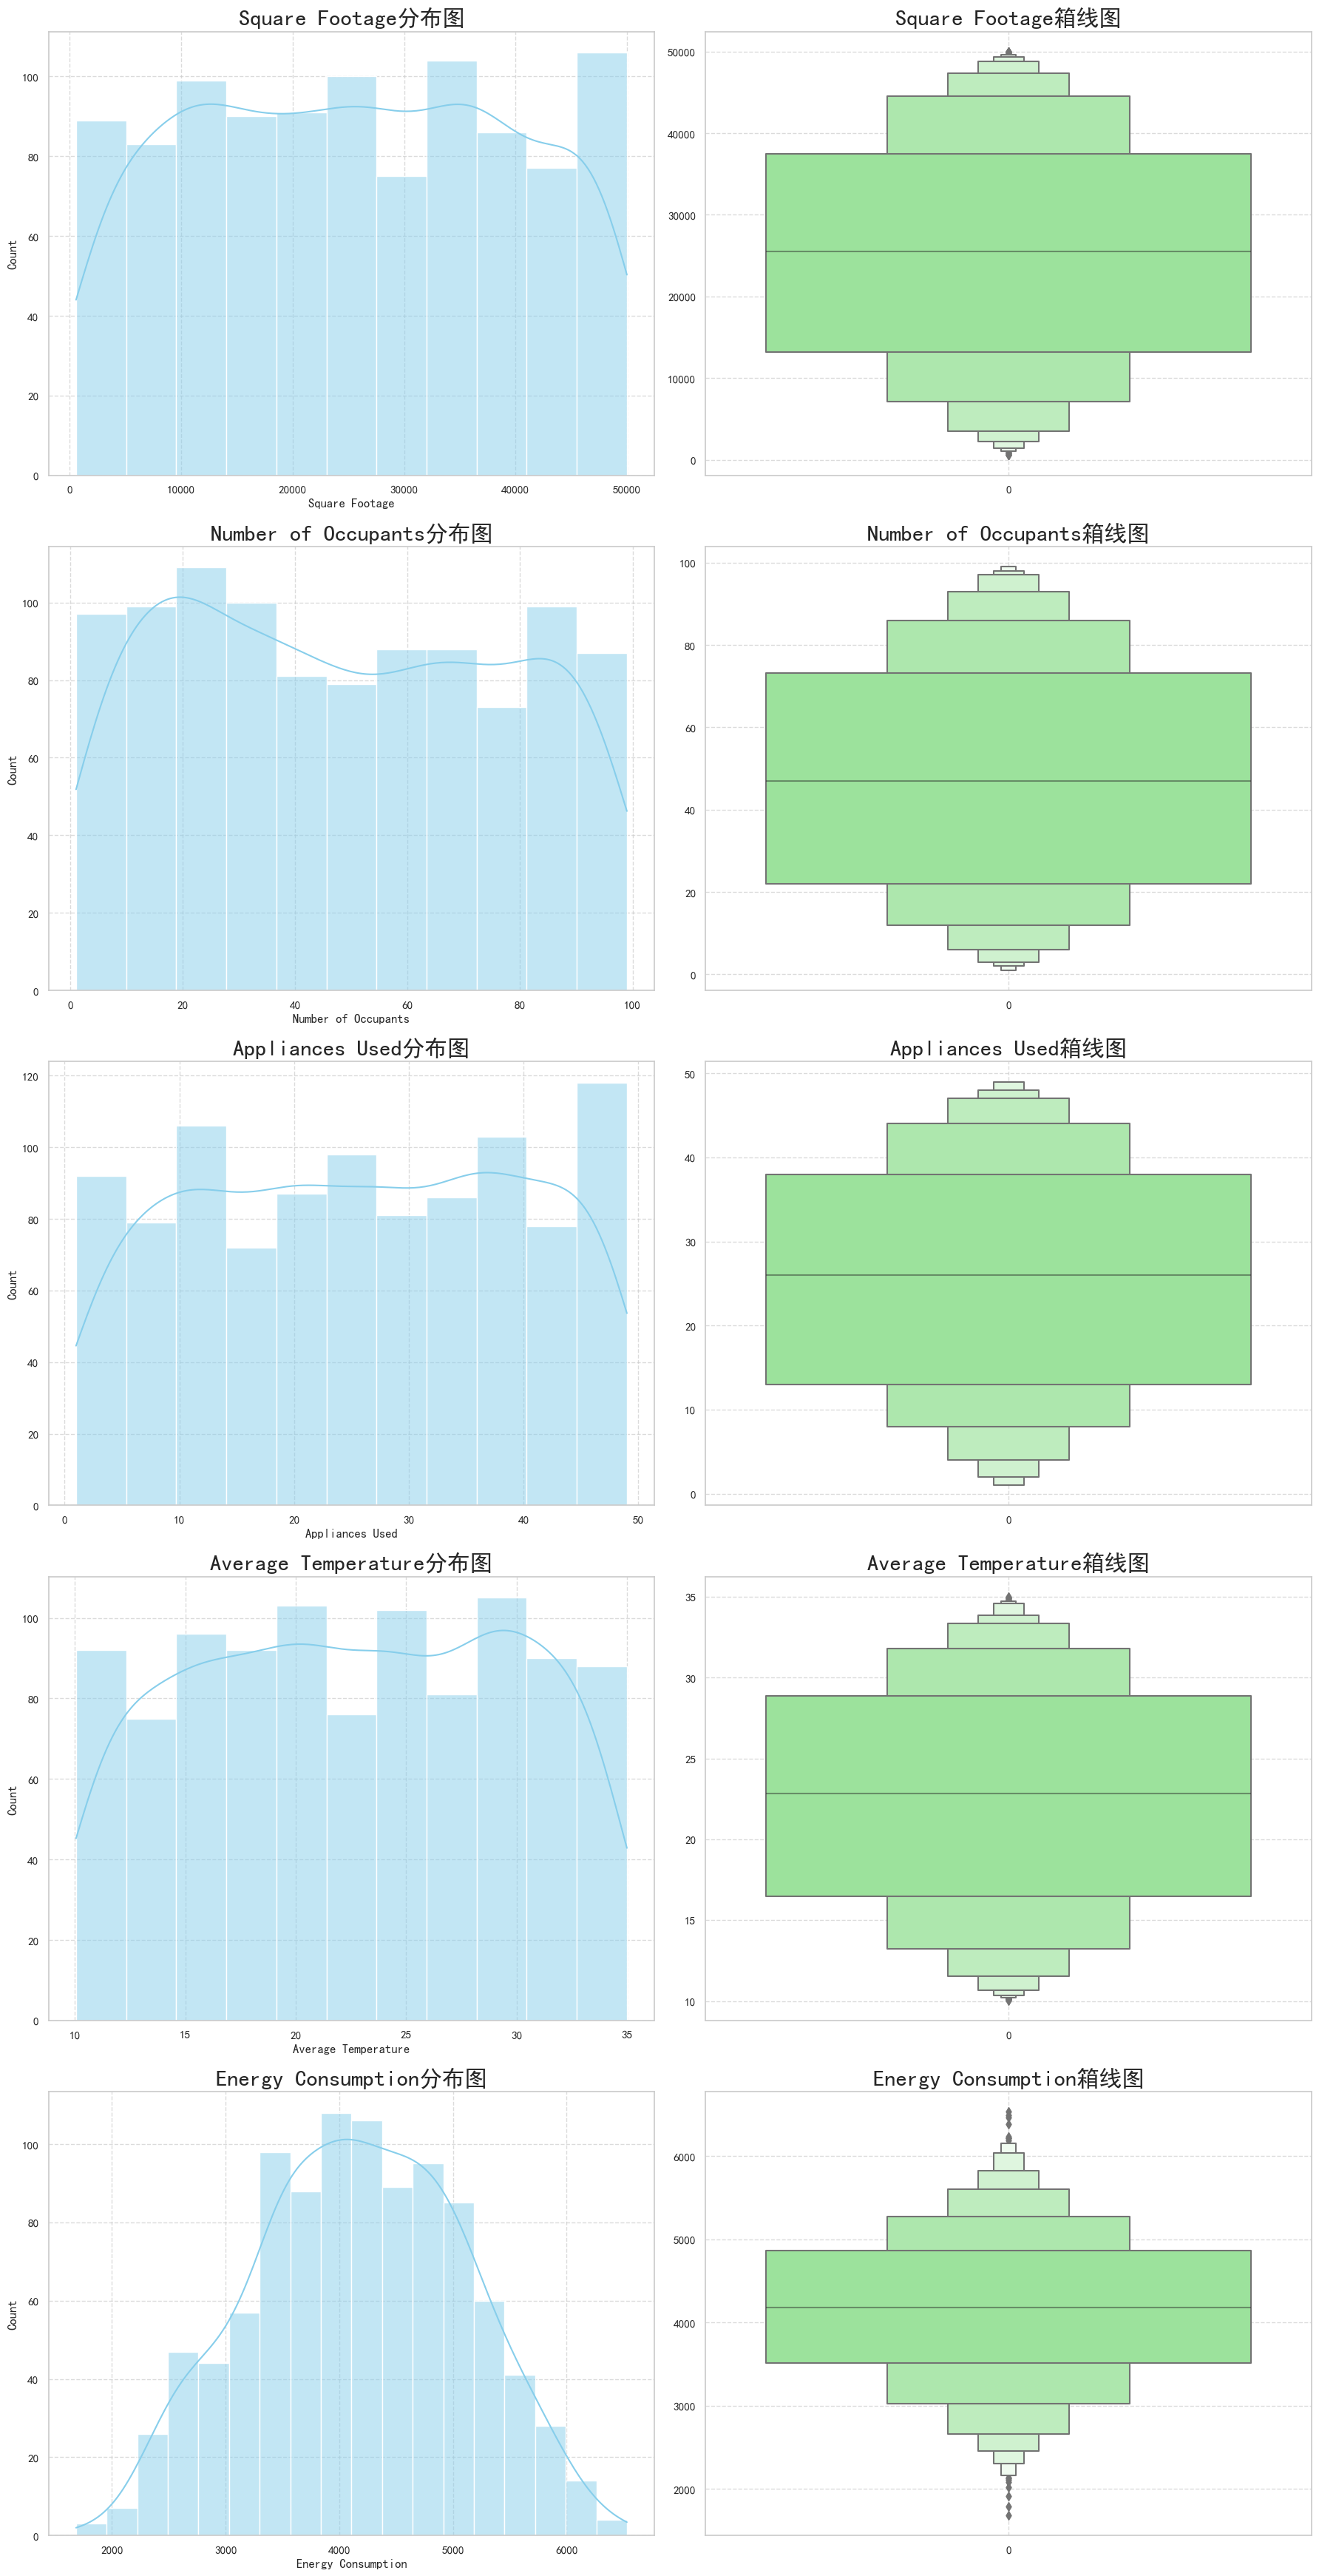

In [90]:
# 数值型特征分布
fig, axes = plt.subplots(len(num_col), 2, figsize=(18, 35))
for i, col in enumerate(num_col):
    sns.histplot(train_df[col], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'{col}分布图', fontsize=22)
    axes[i, 0].grid(True, linestyle='--', alpha=0.7)
    
    sns.boxenplot(train_df[col], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'{col}箱线图', fontsize=22)
    axes[i, 1].grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


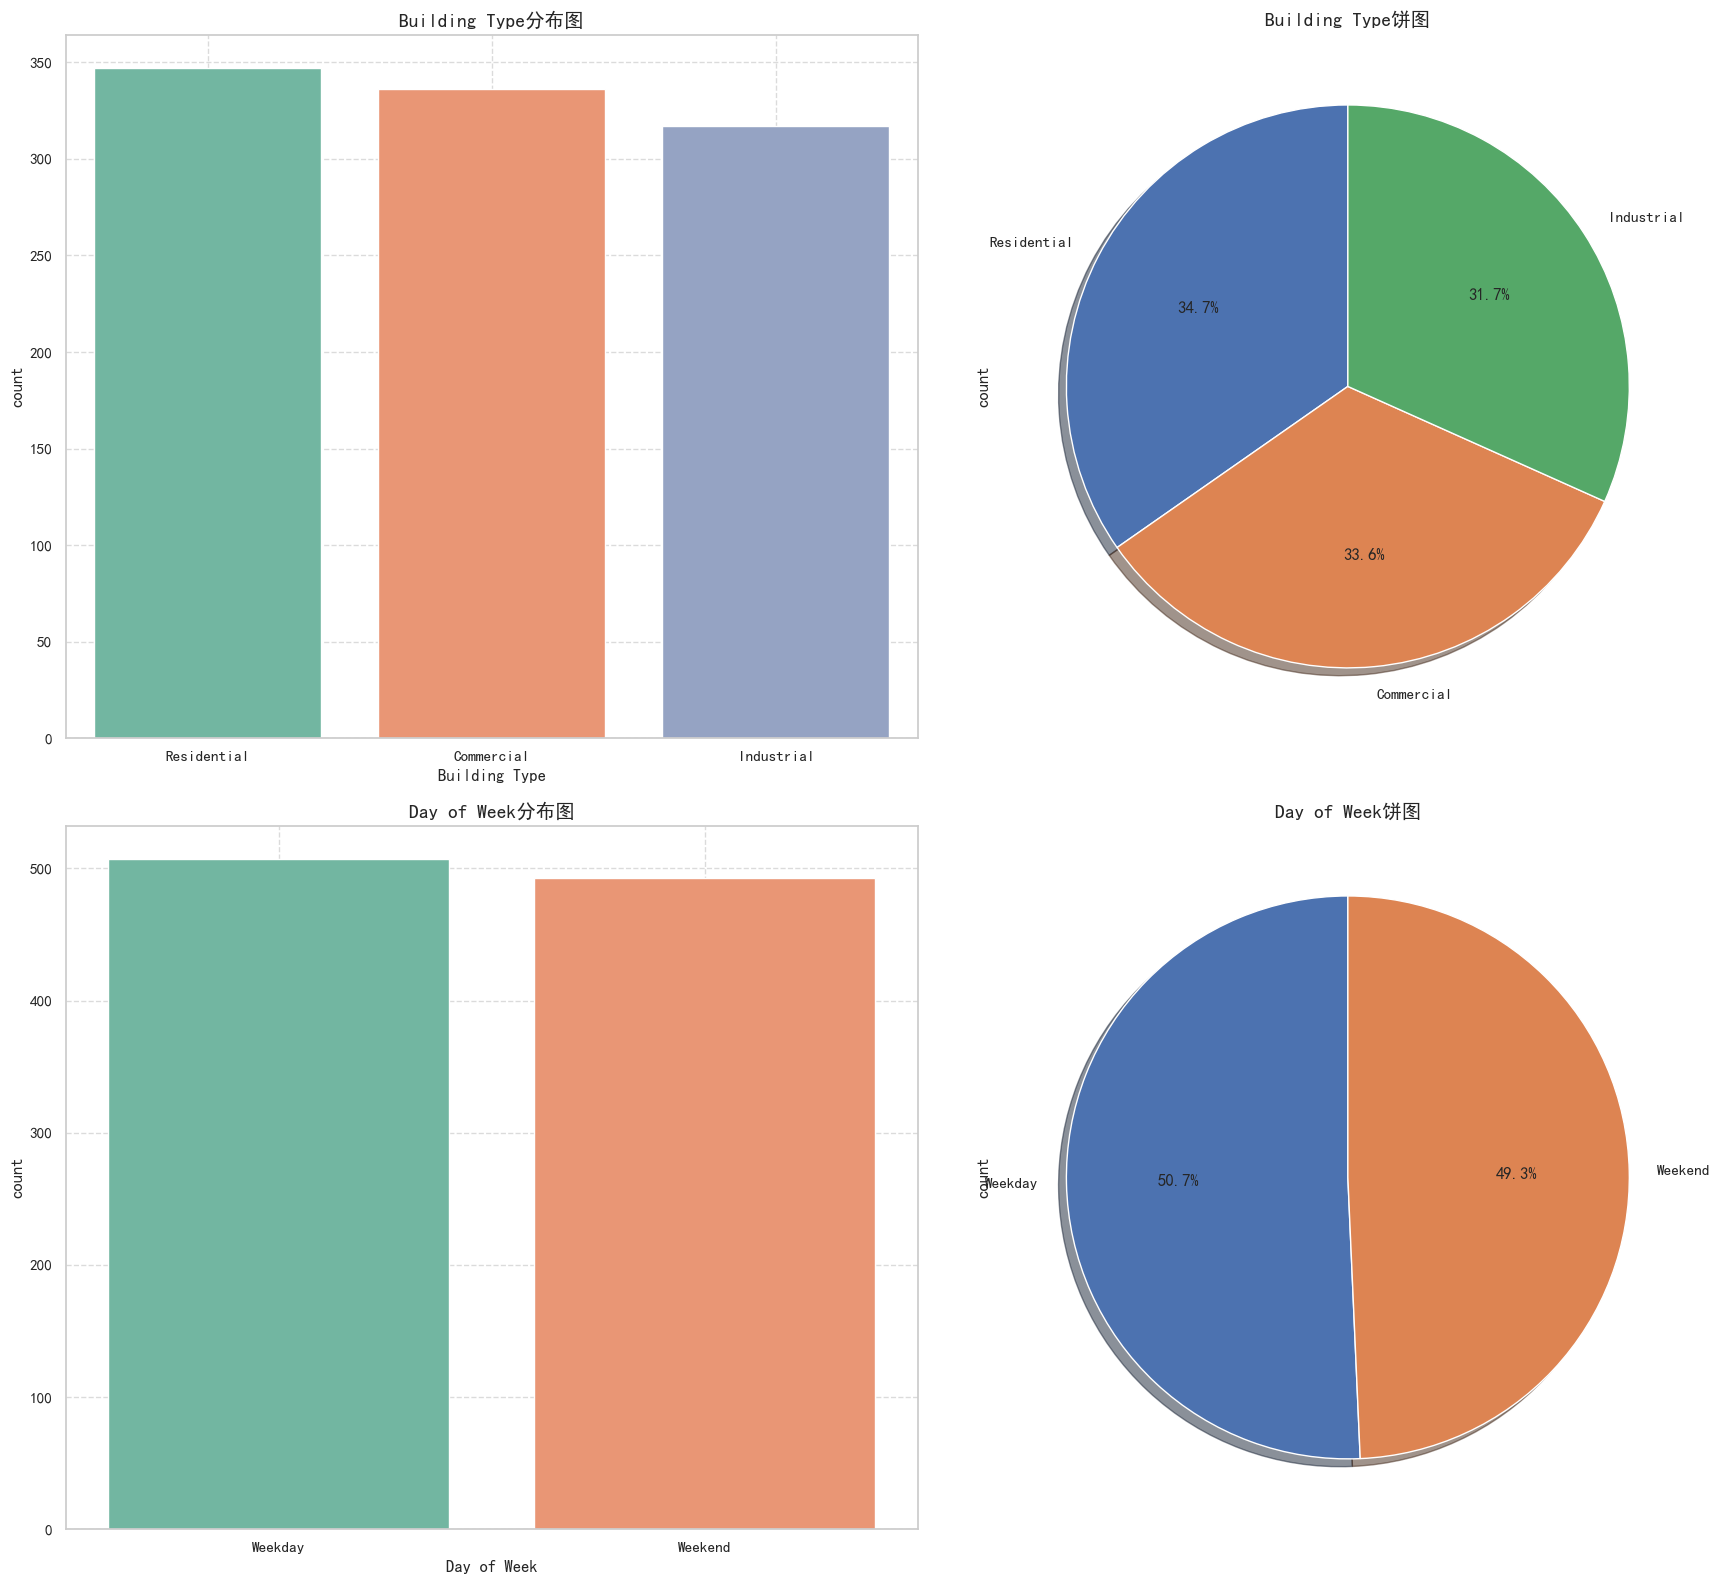

In [91]:
# 分类变量的分布
fig, axes = plt.subplots(len(cat_col), 2, figsize=(18, 16))
for i, col in enumerate(cat_col):
    # 柱形图
    sns.countplot(x=col, data=train_df, ax=axes[i, 0], palette='Set2')
    # 设置标题
    axes[i, 0].set_title(f'{col}分布图', fontsize=14)
    # 设置网格线
    axes[i, 0].grid(True, linestyle='--', alpha=0.7)
    # 饼图
    train_df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i, 1], shadow=True, startangle=90)
    axes[i, 1].set_title(f'{col}饼图', fontsize=14)
plt.tight_layout()
plt.show()


# 多变量的可视化

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

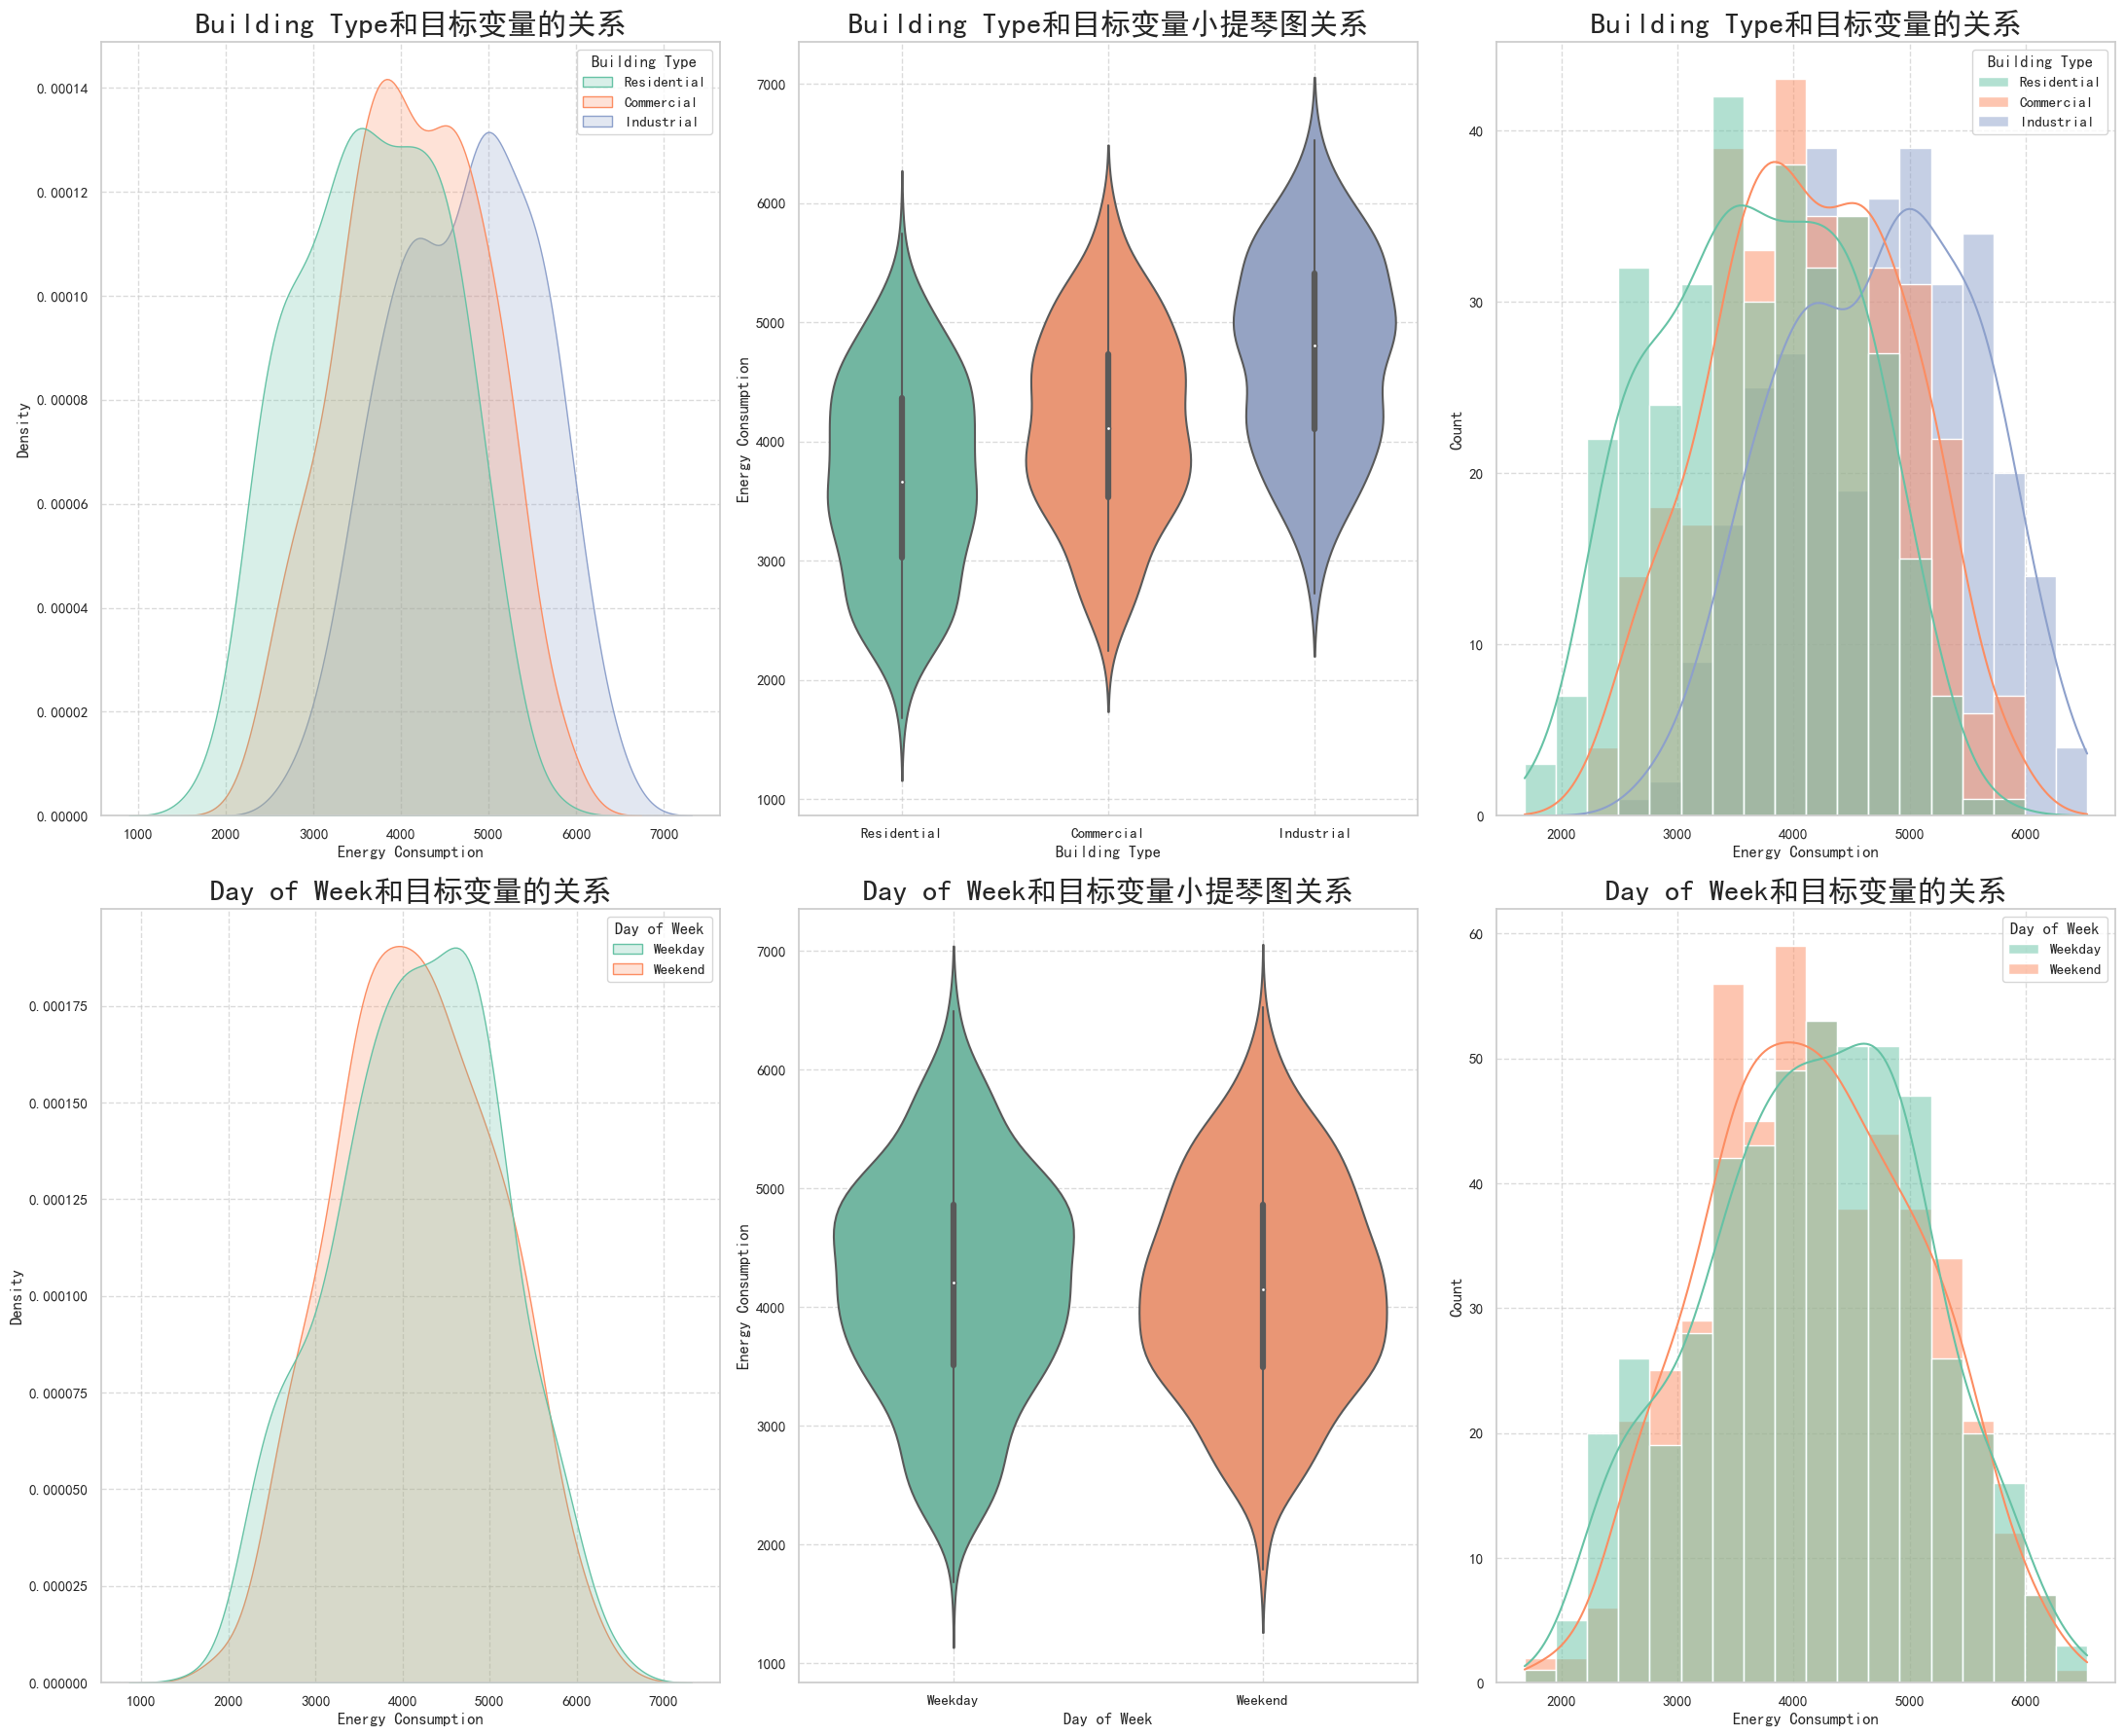

In [92]:
fig, axes = plt.subplots(len(cat_col), 3, figsize=(22, 18))
for i, col in enumerate(cat_col):
    # 密度图
    sns.kdeplot(x='Energy Consumption', hue=col, data=train_df, ax=axes[i, 0], palette='Set2', fill=True)
    axes[i, 0].set_title(f'{col}和目标变量的关系', fontsize=22)
    axes[i, 0].grid(True, linestyle='--', alpha=0.7)
    
    # 小提琴图
    sns.violinplot(x=col, y='Energy Consumption', data=train_df, ax=axes[i, 1], palette='Set2')
    axes[i, 1].set_title(f'{col}和目标变量小提琴图关系', fontsize=22)
    axes[i, 1].grid(True, linestyle='--', alpha=0.7)

    # 频率分布直方图
    sns.histplot(x='Energy Consumption', hue=col, data=train_df, ax=axes[i, 2], palette='Set2', kde=True)
    axes[i, 2].set_title(f'{col}和目标变量的关系', fontsize=22)
    axes[i, 2].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [93]:
print(train_df['Building Type'].value_counts(), train_df['Day of Week'].value_counts())

Building Type
Residential    347
Commercial     336
Industrial     317
Name: count, dtype: int64 Day of Week
Weekday    507
Weekend    493
Name: count, dtype: int64


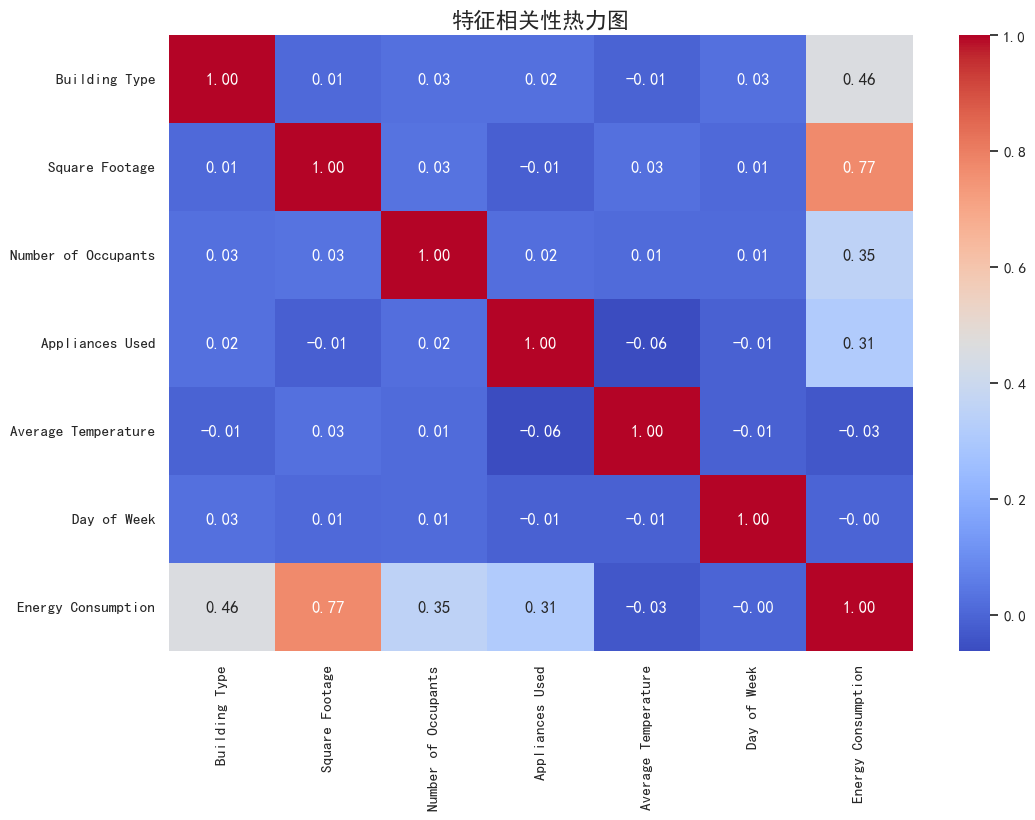

In [ ]:
# 相关性
plt.figure(figsize=(12, 8))
# 编码
train_df['Building Type'] = train_df['Building Type'].map({'Residential': 0, 'Commercial': 1, 'Industrial': 2})
train_df['Day of Week'] = train_df['Day of Week'].map({'Weekday': 0, 'Weekend': 1})
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('特征相关性热力图', fontsize=16)
plt.show()

In [95]:
y = train_df['Energy Consumption']
X = train_df.drop('Energy Consumption', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
feature = ['Square Footage', 'Number of Occupants',	'Appliances Used',	'Average Temperature']

In [97]:
# 训练xgb, lgb,lr模型
scaler = StandardScaler() #标准化
X_train = scaler.fit_transform(X_train[feature])
X_test = scaler.transform(X_test[feature])
# 训练模型，以此保存各个模型的分数
score = {}
# xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
score['xgb'] = mean_squared_error(y_test, y_pred)
# lgb
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)
score['lgb'] = mean_squared_error(y_test, y_pred)
# lr
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
score['lr'] = mean_squared_error(y_test, y_pred)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 4
[LightGBM] [Info] Start training from score 4147.958360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [99]:
score

{'xgb': 237428.77857795477, 'lgb': 212853.95271740988, 'lr': 169644.0132287598}

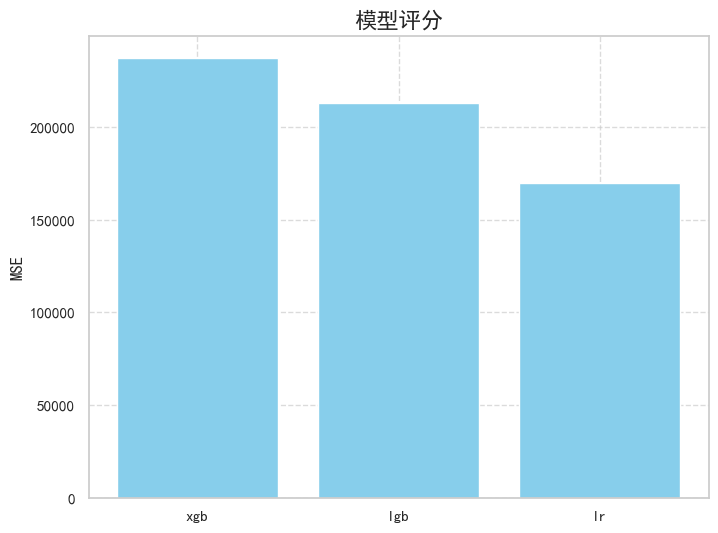

In [100]:
# 可视化
plt.figure(figsize=(8, 6))
plt.bar(score.keys(), score.values(), color='skyblue')
plt.title('模型评分', fontsize=16)
plt.ylabel('MSE')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'